In [ ]:
def S(V, B_s):
    return 10 - 7*V/(B_s+V)
    

def NoTreatmentSys(t, y, params):
    mu_T, mu_T_i, k_s, k_nu, p, p_i, C, C_i, G_s, B, B_s, N = params
    T, T_s, V_s = y
    return [S(V_s, B_s) - mu_T*T + T*p*V_s/(C+V_s) - k_s*V_s*T,
            k_s*V_s*T - mu_T_i*T_s - p_i*T_s*V_s/(C_i+V_s),
            N*p_i*T_s*V_s/(C_i+V_s) - k_nu*T*V_s + G_s*V_s/(B+V_s)]

In [232]:
# No treatment scenarios

scenario = 1

if scenario == 1:
    ymax = 20
    G_s = 80.0
    t_max = 14
    n_points = 1000
elif scenario == 2:
    y_max = 20
    G_s = 180.0
    t_max = 1225
    n_points = 3000
elif scenario == 3:
    y_max = 600
    G_s = 330.0
    t_max = 2100
    n_points = 6000

# Article values for parameters
# params = (0.01, # mu_T
#           0.5,  # mu_T_i
#           2.5e-4, # k_s
#           0.01, # k_nu
#           0.5, # p
#           0.5, # p_i
#           188.0, # C
#           188.0, # C_i
#           G_s, # G_s
#           8.0, # B
#           55.0, # B_s
#           10.0, # N
#          )

# Values designed to fit article plots
params = (0.01, # mu_T
          0.5,  # mu_T_i
          2.3233e-4, # k_s
          0.00825, # k_nu
          0.05, # p
          0.05, # p_i
          188.0, # C
          188.0, # C_i
          G_s, # G_s
          12, # B
          55.0, # B_s
          10.0, # N
         )

Solver = ode_solver()
Solver.algorithm = "rk8pd"
Solver.function = NoTreatmentSys
Solver.ode_solve(y_0 = [1000.0, 0.0, 10.0], t_span=[0.0, t_max], params=params, num_points=n_points)

In [ ]:
S(10, 55) - 0.01*1000 + 1000*0.5*10/(188+10) - 2.5e-4*10*1000

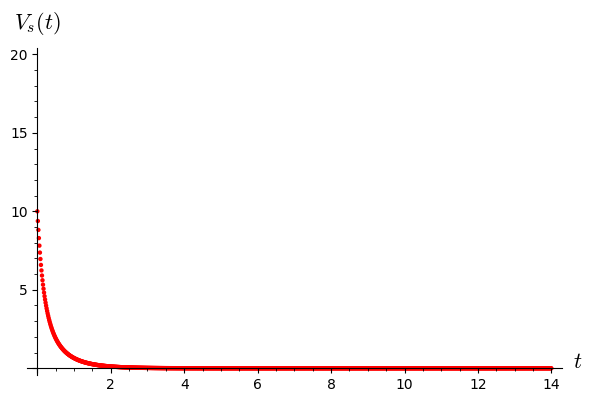

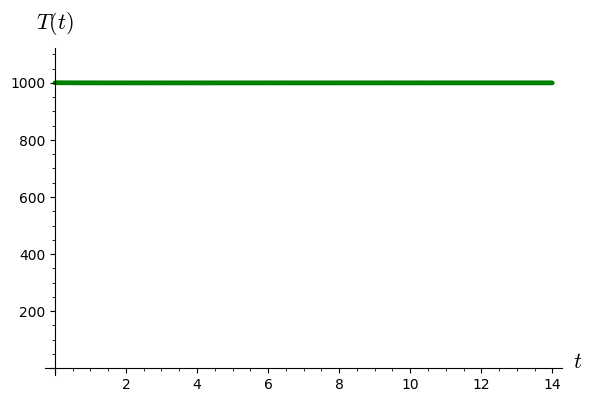

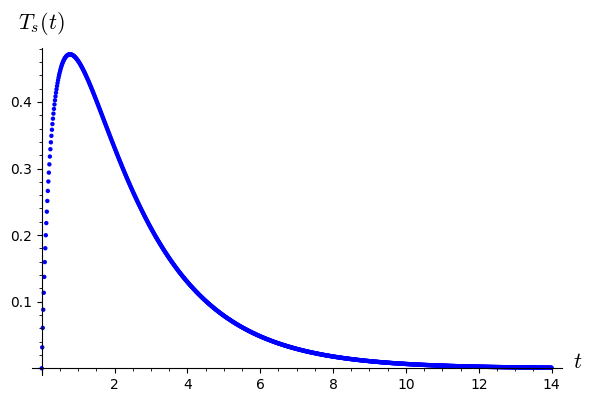

In [233]:
Solver.plot_solution(i=2, color="red", axes_labels=["$t$", "$V_s(t)$"], ymin=0, ymax=ymax)
Solver.plot_solution(i=0, color="green", axes_labels=["$t$", "$T(t)$"], ymin=0, ymax=1100)
Solver.plot_solution(i=1, color="blue", axes_labels=["$t$", "$T_s(t)$"])

In [ ]:
T = list_plot([ (state[0], state[1][0]) for state in Solver.solution],
              color="blue",
              pointsize=10,
              legend_label="T",
              ymin=0,
              ymax = 1100)
V = list_plot([ (state[0], state[1][2]) for state in Solver.solution],
              color="red",
              pointsize=10,
              legend_label="V",
              ymin=0,
              ymax=20)
T_s = list_plot([ (state[0], state[1][1]) for state in Solver.solution],
                color="green",
                pointsize=10,
                legend_label="T_s")
T.legend()
V.legend()
show(T)
show(V)
show(T_s)

In [ ]:
1 * 1 * 1 / ( 1 + 1 ) - 3 / 4 + 1 / 2

In [ ]:
2.5e-4